In [419]:
library(data.table)
library(tidyverse)
library(ggrepel)
library(VennDiagram)
library(pheatmap)
library(cowplot)
library(paletteer)
library(grid)
library(gtable)
library(ggforce)
library(ComplexHeatmap)
source("utils.R")

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))
! pheatmap() has been masked by ComplexHeatmap::pheatmap(). Most of the arguments
   in the original pheatmap() are identically supported in the new function. You 
   can still use the original function by explicitly calling pheatmap::pheatmap().



Attaching package: ‘ComplexHeatmap’


The following object is masked from ‘package:pheatmap’:

    pheatmap




### Fig3a

file read in 

In [58]:
MP <- fread("~/HSPC_zenedo/Fig3/HSC_MP_Fig3A.txt")
LP <- fread("~/HSPC_zenedo/Fig3/HSC_LP_Fig3A.txt")
pie_col <- c( 
            "#e0f3f8", "#abd9e9", "#74add1", "#4575b4", "#313695", 
            "#fde0ef", "#F1948A", "#E74C3C", "#d73027", "#a50026")
explode_categories <- c("De_1", "De_2", "De_3", "De_4", "De_5")

In [183]:
MP <- MP %>%
  mutate(
    fraction = num / sum(num),                      
    cumulative_fraction = cumsum(fraction),             
    start = cumulative_fraction - fraction,             
    end = cumulative_fraction,                           
    explode_dist = ifelse(tile %in% explode_categories, 0.5, 0),  
    explode_x = ifelse(tile %in% explode_categories, 
                       explode_dist * cos(pi / 1.7 ), 0),  
    explode_y = ifelse(tile %in% explode_categories, 
                       explode_dist * sin(pi / 1.1), 0)   
  )
LP <- LP %>%
  mutate(
    fraction = num / sum(num),                      
    cumulative_fraction = cumsum(fraction),             
    start = cumulative_fraction - fraction,             
    end = cumulative_fraction,                           
    explode_dist = ifelse(tile %in% explode_categories, 0.5, 0),  
    explode_x = ifelse(tile %in% explode_categories, 
                       explode_dist * cos(pi / 1.7 ), 0),  
    explode_y = ifelse(tile %in% explode_categories, 
                       explode_dist * sin(pi / 1.1), 0)   
  )
p1 <- ggplot()+
  xlab("")+ylab('')+
  scale_fill_manual(values = pie_col, name="Methylation", 
                    labels=c("0-0.1", "0.1-0.2", "0.2-0.3", "0.3-0.4", "0.4-1", 
                             "0-0.1", "0.1-0.2", "0.2-0.3", "0.3-0.4", "0.4-1"))+
  geom_arc_bar(data=MP,
               aes(x0=explode_x,y0=explode_y,r0=0,r=2,
                   start = start * 2 * pi, end = end * 2 * pi,
                   amount=num,fill=tile) 
  ) + 
  coord_fixed() +                                     
  theme_void() + 
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.ticks = element_blank(), 
        axis.text.y = element_blank(),
        axis.text.x = element_blank(),
        legend.title = element_blank(), 
        panel.border = element_blank(),
        panel.background = element_blank(), 
        legend.position = "none") + 
  annotate('text', x=0,  y= 3.5, label="HSC/MPP→Early myeloid progenitor", fontface = "bold") + 
  annotate('text', x=0,  y= 3, label="Increasing tiles: 53.3 %") + 
  annotate('text', x=0.02,  y= 2.6, label="Decreasing tiles: 46.7 %") 
p2 <- ggplot()+
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.ticks = element_blank(), 
        axis.text.y = element_blank(),
        axis.text.x = element_blank(),
        legend.title=element_blank(), 
        panel.border = element_blank(),
        panel.background = element_blank())+
  xlab("")+ylab('')+
  scale_fill_manual(values = pie_col, name="diff methylation", 
                    labels=c("0-0.1", "0.1-0.2", "0.2-0.3", "0.3-0.4", "0.4-1", 
                             "0-0.1", "0.1-0.2", "0.2-0.3", "0.3-0.4", "0.4-1"))+
  geom_arc_bar(data=LP,
               aes(x0=explode_x,y0=explode_y,r0=0,r=2,
                   start = start * 2 * pi, end = end * 2 * pi,
                   amount=num,fill=tile)
  ) + 
  coord_fixed() +                                     
  theme_void() +
  annotate('text', x=0,  y= 3.5, label="HSC/MPP→Early lymphoid progenitor", fontface = "bold") + 
  annotate('text', x=0,  y= 3, label="Increasing tiles: 51.8 %") + 
  annotate('text', x=0.02,  y= 2.6, label="Decreasing tiles: 48.2 %") 

Warning message in geom_arc_bar(data = MP, aes(x0 = explode_x, y0 = explode_y, r0 = 0, :
“Ignoring unknown aesthetics: amount”
Warning message in geom_arc_bar(data = LP, aes(x0 = explode_x, y0 = explode_y, r0 = 0, :
“Ignoring unknown aesthetics: amount”


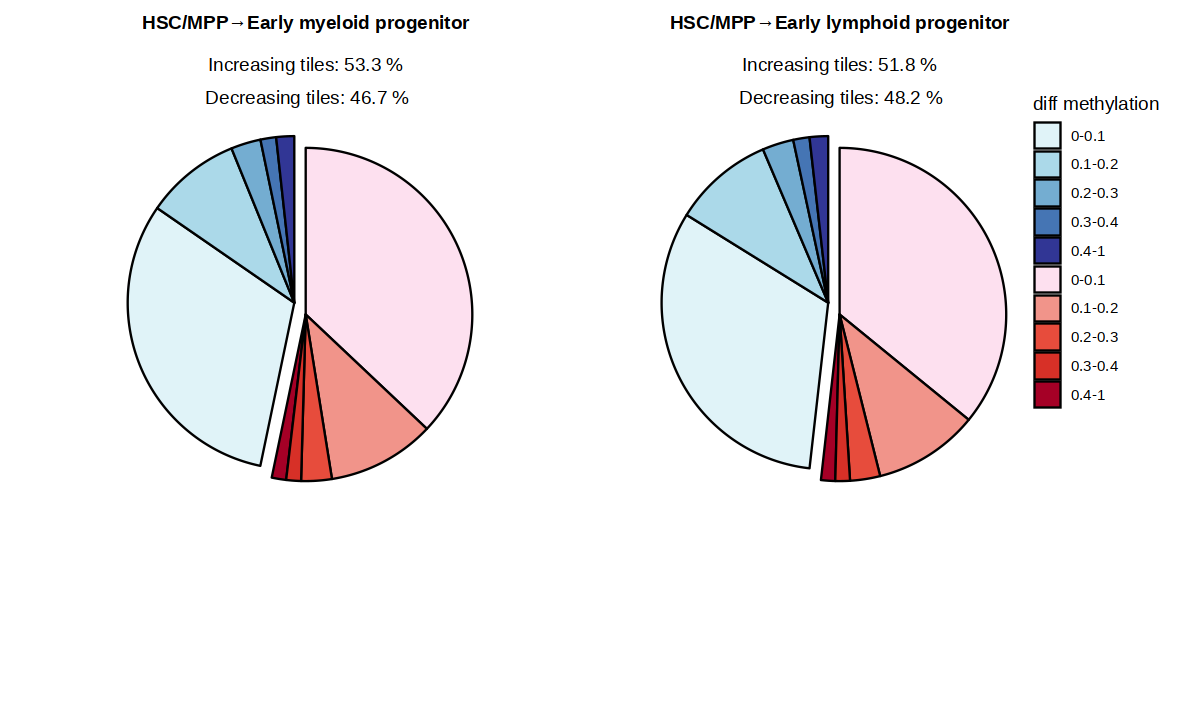

In [188]:
options(repr.plot.width=10, repr.plot.height=6)
ggdraw() + 
    draw_plot(p1, x = 0, y = .3, width = .5, height = .7) +
    draw_plot(p2, x = .5, y = .3, width = .5, height = .7) 

### Fig3b

In [191]:
load("~/HSPC_zenedo/Fig3/data_for_Fig3b.RData")

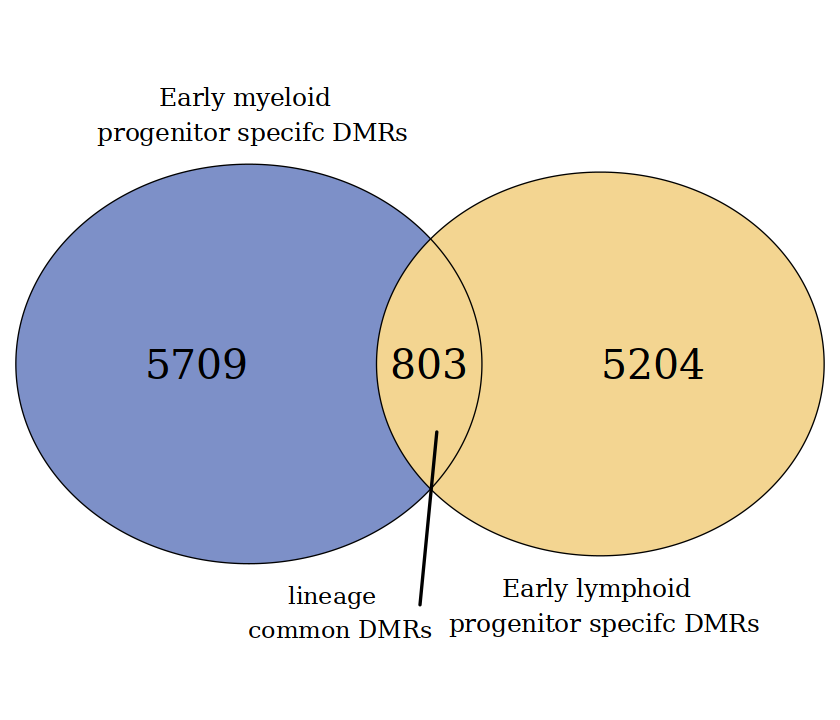

In [238]:
options(repr.plot.width=7, repr.plot.height=6)
a <- venn.diagram(x = list(MP=DMR_EMP, LP=DMR_ELP),
                  category.names = c("Early myeloid \n progenitor specifc DMRs", "Early lymphoid \n progenitor specifc DMRs"), 
                  filename = NULL, 
                  lwd = 0.8,
                  alpha = 1,
                  fill = c(alpha("#7D90C8", 1), alpha('#F3D591', 1)), 
                  cex = 2,
                  fontfamily = "serif",
                  cat.col = c("#000000", "#000000"),
                  cat.cex = 1.2,
                  cat.fontfamily = "serif",
                  cat.pos = c(0, 180), 
                  cat.dist = 0.05
)
grid.draw(a)
grid.text("lineage \n common DMRs", x = 0.4, y = 0.15, gp = gpar(fontsize = 14, col = "black", fontfamily = "serif"))
grid.lines(
  x = c(0.5, 0.52), 
  y = c(0.16, 0.4),  
  gp = gpar(col = "black", lwd = 2)  
)

### Fig3c

In [245]:
load("~/HSPC_zenedo/Fig3/Fig3c_heatmap.RData")
load("~/HSPC_zenedo/Fig3/Fig3c_lineplot.RData")

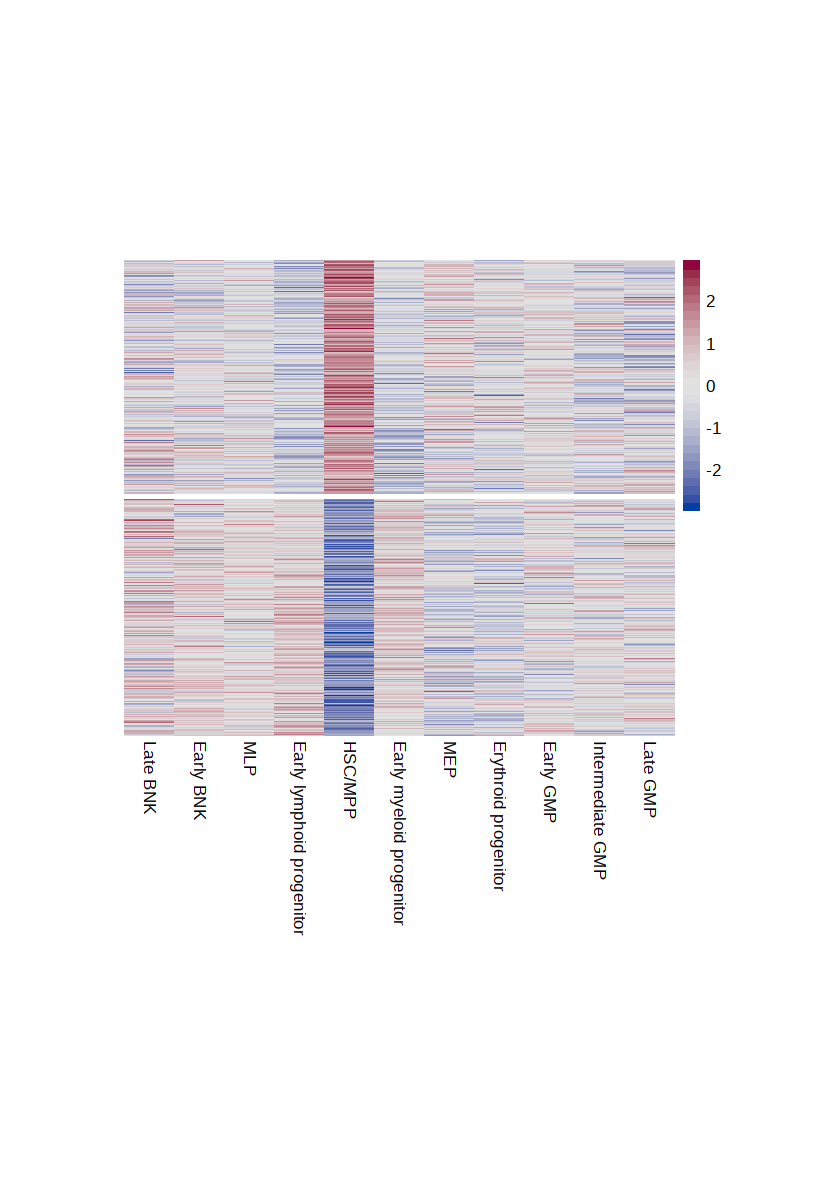

In [359]:
p <- pheatmap(common, show_rownames = F, cluster_rows = F, cluster_cols = F, 
                   color = paletteer_c("grDevices::Blue-Red", 30),  
                   cellwidth = 30, cellheight = 0.35, gaps_row = c(398), scale="row")
p2 <- ggplot(w2, aes(x=celltype, y=met, color=group)) +
  geom_point(size=3) +
  geom_line(aes(group=group), size=1) +
  coord_cartesian(ylim = c(0.4, 0.8)) +
  scale_y_continuous(breaks = seq(0.4, 0.8, by = 0.2)) +
  theme_classic() +
  scale_color_manual(values = c("#9D365E", "#3360AB")) + 
  theme(axis.text.x = element_blank(), axis.text.y = element_text(size=14, color = "black"), 
        axis.title = element_text(size=18, color="black"), axis.title.x = element_blank(), legend.position = "none", axis.ticks.y = element_blank()) + 
  ylab("DNA methylation")

Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”


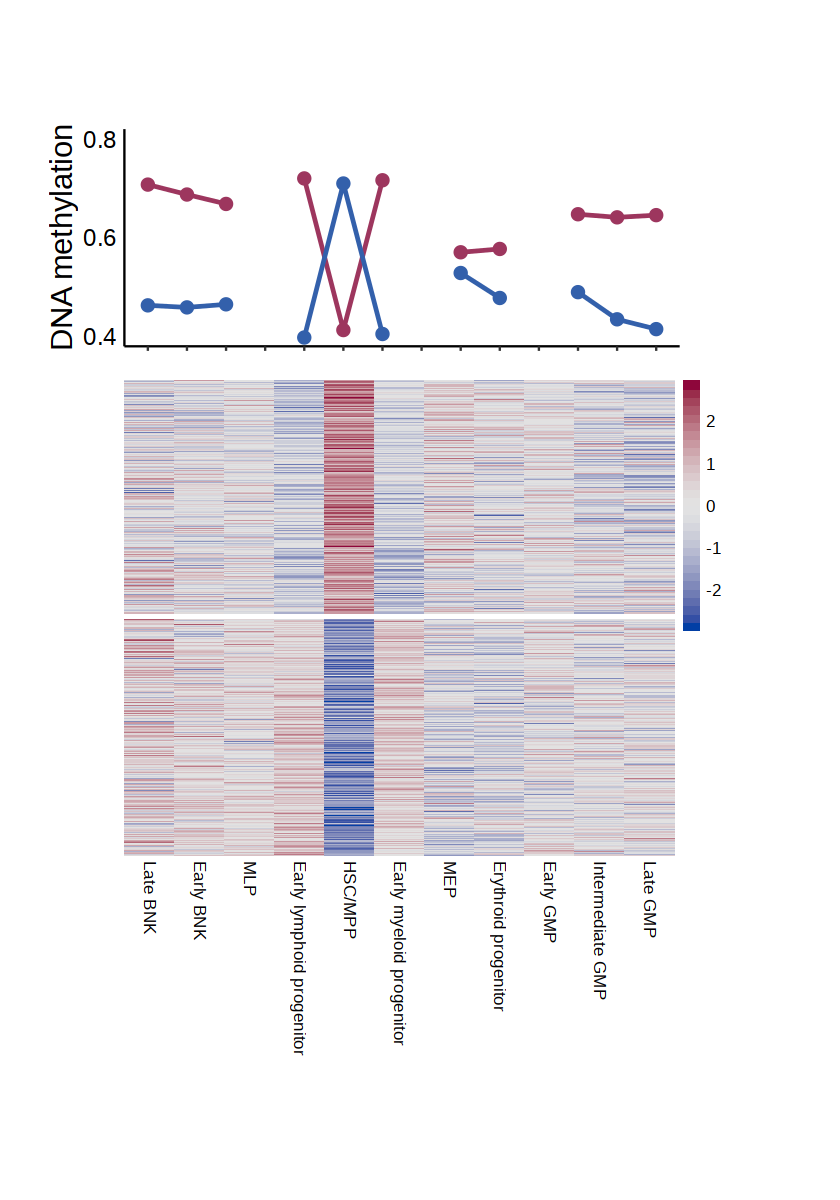

In [361]:
options(repr.plot.width=7, repr.plot.height=10)
ggdraw() + 
    draw_plot(p$gtable, x = 0, y = 0.15, width = 1, height = .5) +
    draw_plot(p2, x = 0.05, y = 0.7, width = 0.77, height = .2) 

### Fig3d

In [397]:
load("~/HSPC_zenedo/Fig3/Fig3d_heatmap.RData")
load("~/HSPC_zenedo/Fig3/Fig3d_lineplot.RData")

In [380]:
p <- pheatmap::pheatmap(MP, show_rownames = F, cluster_rows = F, cluster_cols = F, 
                   color = paletteer_c("grDevices::Blue-Red", 30), 
                   cellwidth = 40, cellheight = 0.05, gaps_row = c(3201))
p2 <- ggplot(MP_mean, aes(x=celltype, y=met, color=group)) +
  geom_point(size=3) +
  geom_line(aes(group=group), size=1) +
  coord_cartesian(ylim = c(0.4, 0.85)) +
  scale_y_continuous(breaks = seq(0.4, 0.9, by = 0.2)) +
  theme_classic() +
  scale_color_manual(values = c("#9D365E", "#3360AB")) + 
  theme(axis.text.x = element_blank(), axis.text.y = element_text(size=14, color = "black"), 
        axis.title = element_text(size=18, color="black"), axis.title.x = element_blank(), legend.position = "none", axis.ticks.x = element_blank()) + 
  ylab("DNA methylation")

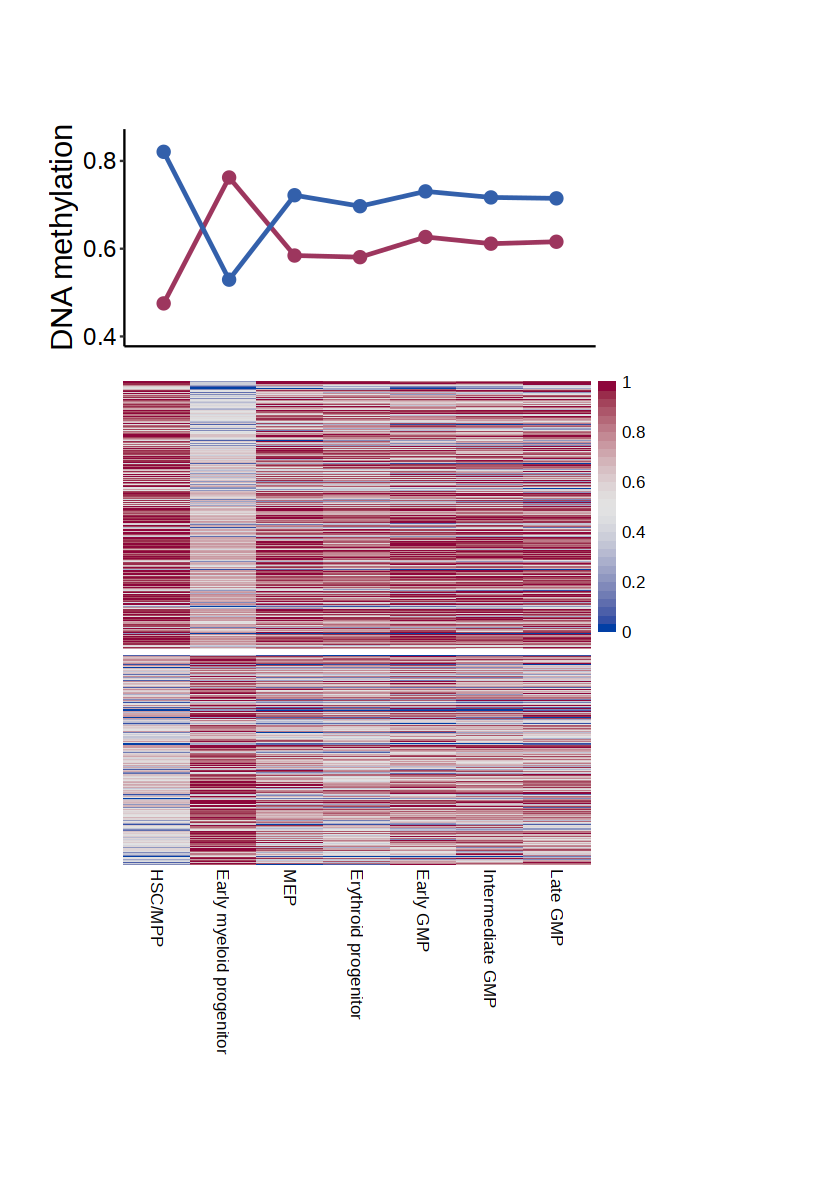

In [388]:
options(repr.plot.width=7, repr.plot.height=10)
ggdraw() + 
    draw_plot(p$gtable, x = 0, y = 0.15, width = 0.9, height = .5) +
    draw_plot(p2, x = 0.05, y = 0.7, width = 0.67, height = .2) 

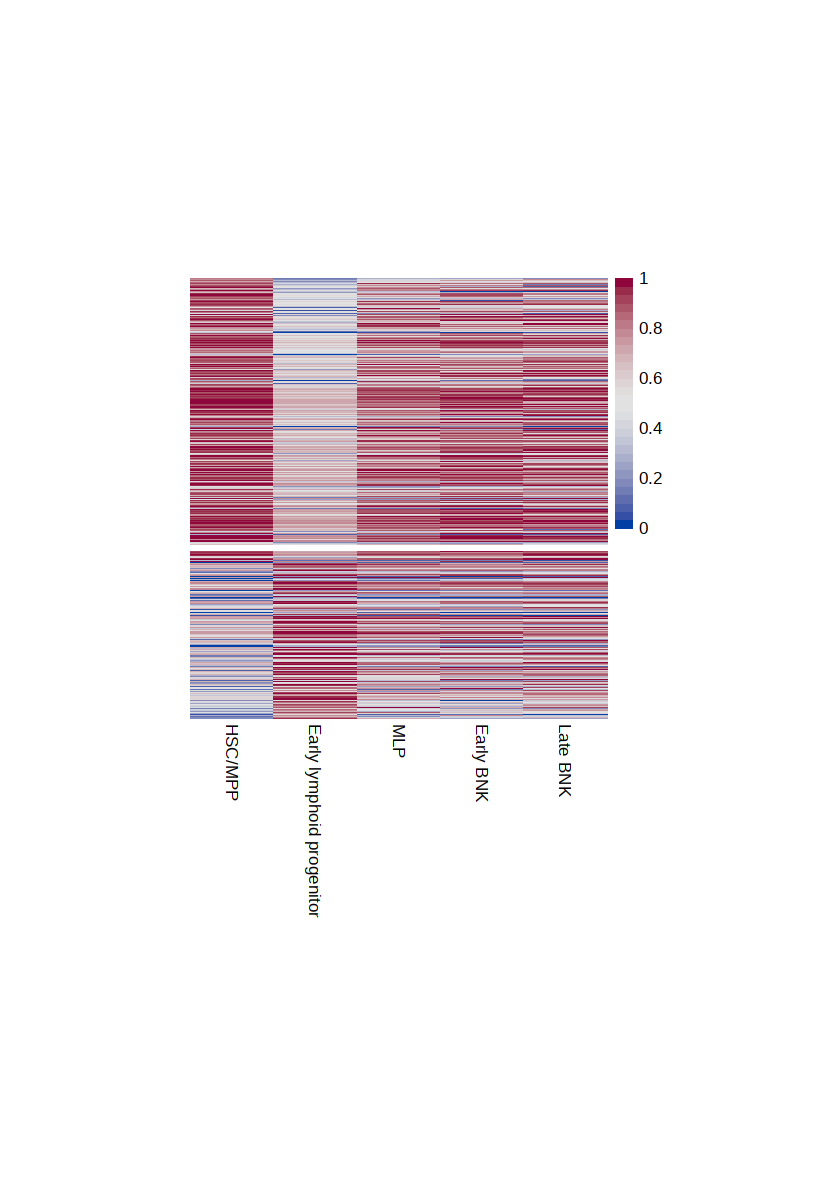

In [400]:
p <- pheatmap::pheatmap(LP, show_rownames = F, cluster_rows = F, cluster_cols = F, 
                   color = paletteer_c("grDevices::Blue-Red", 30), 
                   cellwidth = 50, cellheight = 0.05, gaps_row = c(3201))
p2 <- ggplot(LP_mean, aes(x=celltype, y=met, color=group)) +
  geom_point(size=3) +
  geom_line(aes(group=group), size=1) +
  coord_cartesian(ylim = c(0.4, 0.85)) +
  scale_y_continuous(breaks = seq(0.4, 0.9, by = 0.2)) +
  theme_classic() +
  scale_color_manual(values = c("#9D365E", "#3360AB")) + 
  theme(axis.text.x = element_blank(), axis.text.y = element_text(size=14, color = "black"), 
        axis.title = element_text(size=18, color="black"), axis.title.x = element_blank(), legend.position = "none", axis.ticks.x = element_blank()) + 
  ylab("DNA methylation")

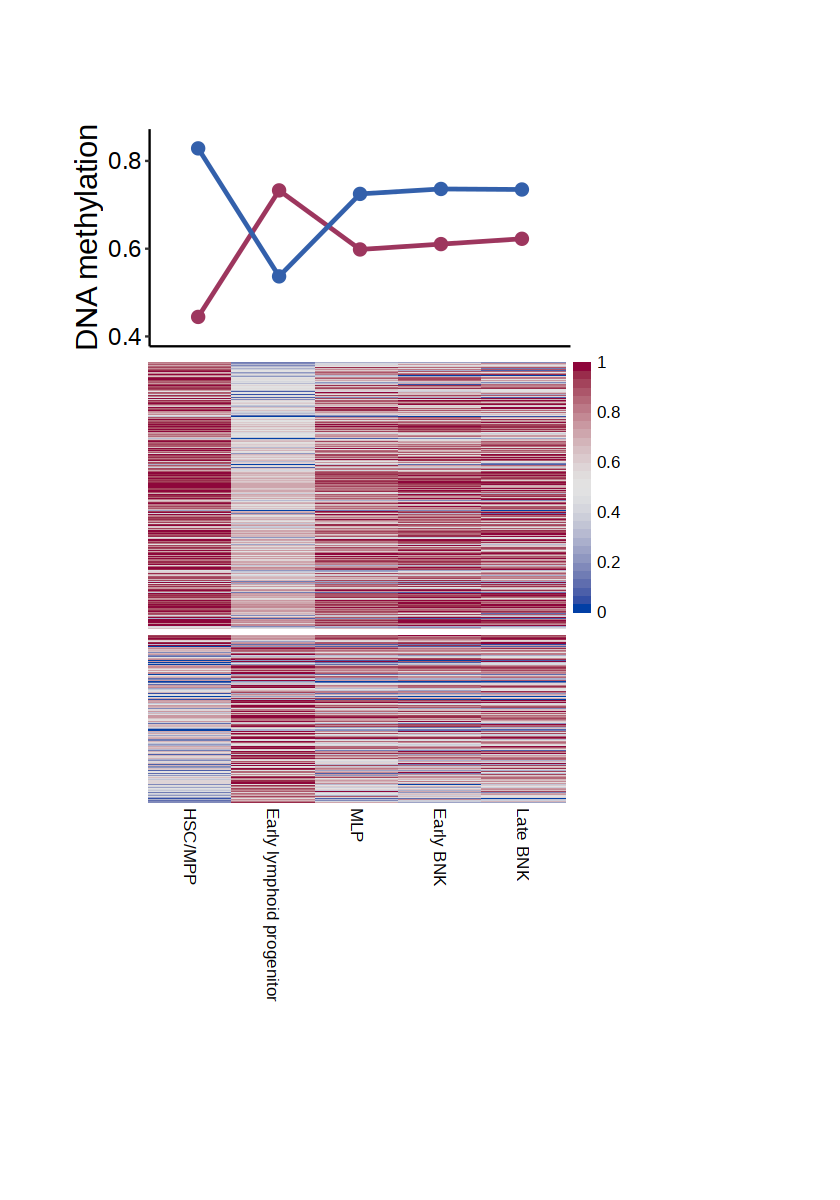

In [409]:
options(repr.plot.width=7, repr.plot.height=10)
ggdraw() + 
    draw_plot(p$gtable, x = 0, y = 0.18, width = 0.9, height = .5) +
    draw_plot(p2, x = 0.08, y = 0.7, width = 0.61, height = .2) 

### Fig3e

In [410]:
load("~/HSPC_zenedo/Fig3/Fig3e_heatmap.RData")

In [411]:
p <- pheatmap(w3, show_rownames=F, scale = "row", cluster_cols=F, 
         clustering_method = "ward.D2", #gaps_col = c(3, 6, 8), 
         cutree_rows = 4, fontsize = 8, 
         color = paletteer_c("grDevices::Blue-Red", 30), 
          gaps_col = c(4, 5), cellwidth = 28, cluster_rows = T, 
         gaps_row = c(34, 104, 194))

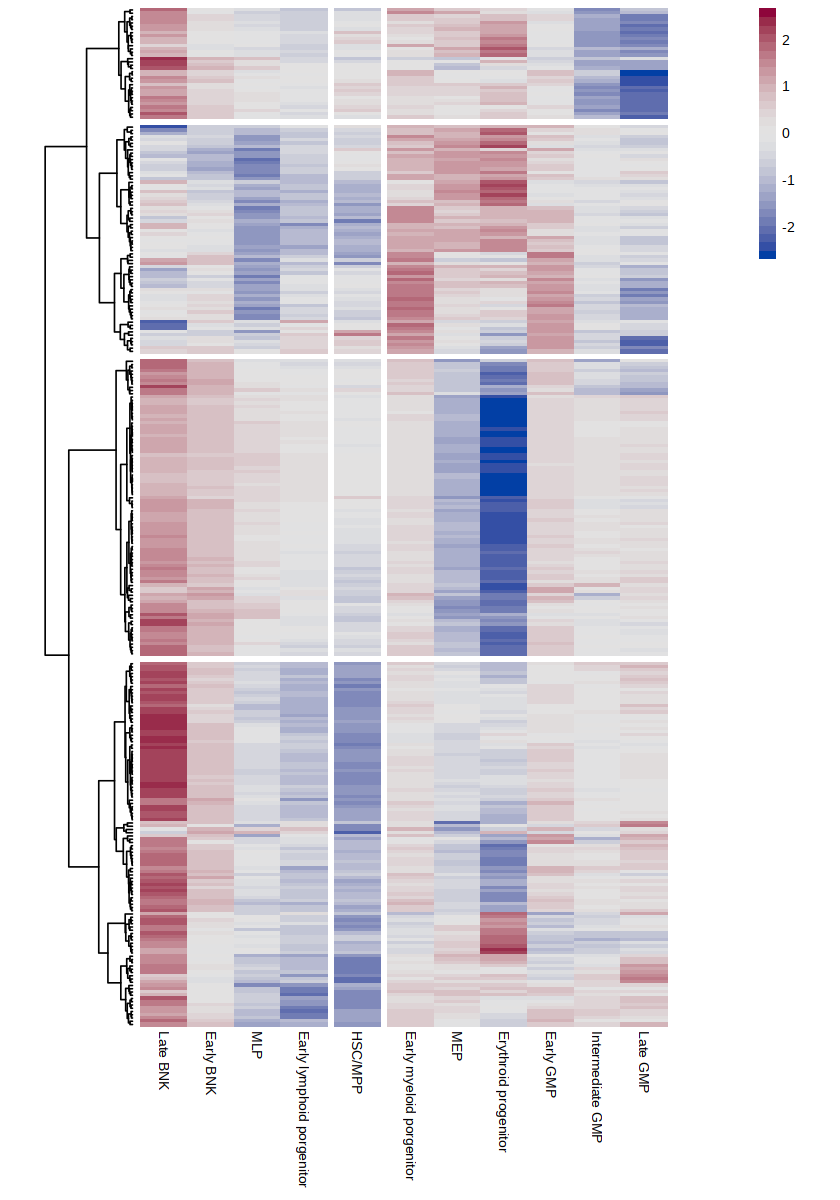

In [412]:
p

### Fig3f

In [421]:
load("~/HSPC_zenedo/Fig3/Fig3f_heatmap.RData")

Warning message:
“The input is a data frame, convert it to a matrix.”


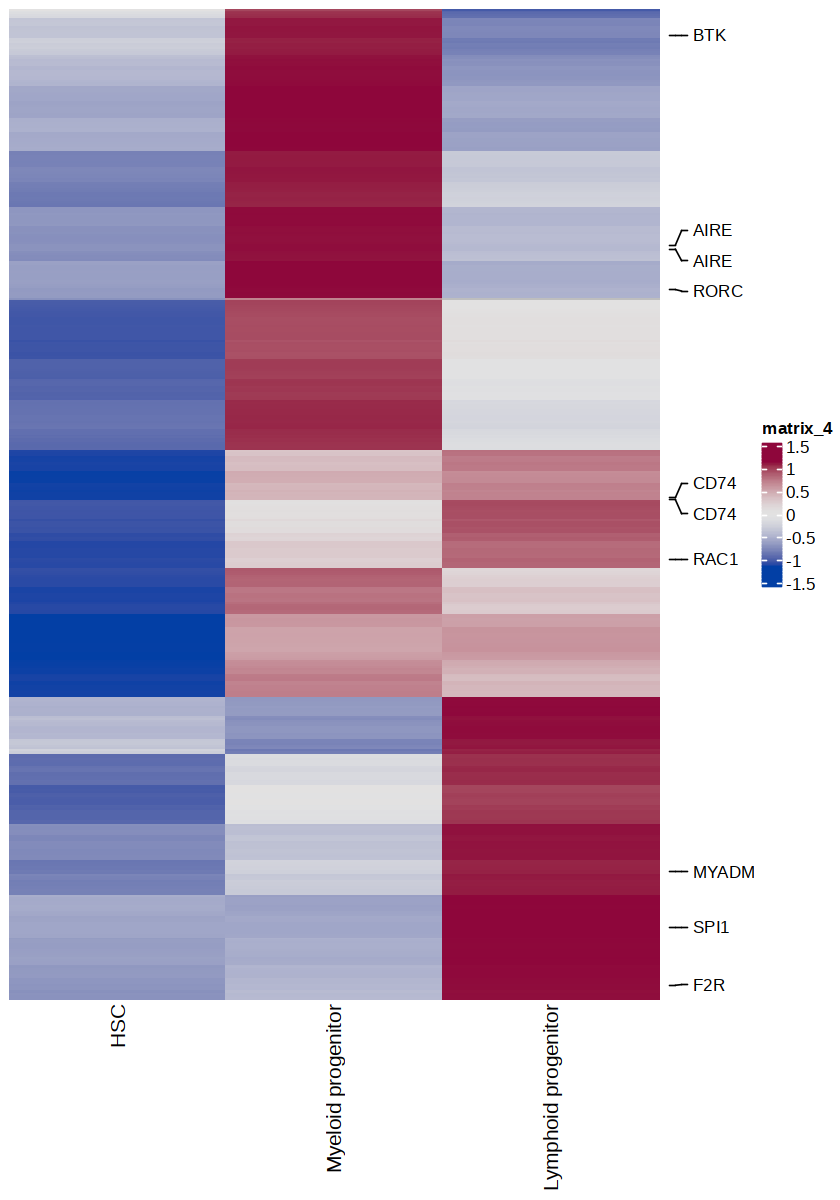

In [422]:
ComplexHeatmap::Heatmap(scaled_mat2[, 1:3], show_row_names = F,  
                        cluster_columns = F, row_order = order$label, 
                        cluster_rows = F, show_column_names = T,  
                        #split = 3, 
                        col =  paletteer_c("grDevices::Blue-Red", 30)
) +
  rowAnnotation(link = anno_mark(at = which(scaled_mat2$gene %in% gene), 
                                 labels = scaled_mat2$gene[which(scaled_mat2$gene %in% gene)], 
                                 labels_gp = gpar(fontsize = 10)))